In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score



# Naive Upsample Model

In [2]:
df = pd.read_csv('mortgage.csv')

In [3]:
df.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [4]:
#drop rows with null values, only 270/600K and represents proportionate amount of delinquent loans
df = df.dropna()

In [5]:
df['default'] = df['default_time']

In [6]:
del df['default_time']

In [7]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,payoff_time,status_time,default
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [8]:
df.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,payoff_time,status_time,default
count,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,6.222190e+05,622219.000000,622219.000000,622219.000000,622219.000000,...,622219.000000,622219.000000,6.222190e+05,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000
mean,25141.021848,35.799309,20.576450,24.606801,137.213671,2.460523e+05,83.078239,6.700836,184.102317,1.381058,...,0.611904,0.138286,2.563651e+05,673.668734,78.976433,5.650538,198.148398,0.042721,0.109796,0.024353
std,13749.623014,11.580002,7.610427,6.739667,19.530448,2.141613e+05,24.968839,2.077520,27.650825,1.964707,...,0.487317,0.345200,2.197009e+05,71.690396,10.127634,2.976440,33.934437,0.202228,0.427999,0.154143
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,...,0.000000,0.000000,4.791500e+03,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13577.000000,27.000000,18.000000,21.000000,137.000000,1.021175e+05,67.109446,5.650000,158.600000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24873.000000,34.000000,22.000000,25.000000,142.000000,1.807573e+05,82.253269,6.625000,180.520000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37038.000000,44.000000,25.000000,28.000000,145.000000,3.375570e+05,100.634381,7.875000,212.730000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.451500,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.290000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,2.000000,1.000000


In [9]:
#split data between trainin and testing sets to maintain blind testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :22], df.iloc[:, 22], 
                                                    test_size = 0.2, random_state=42)

In [10]:
!pip install imblearn

In [11]:
import imblearn.over_sampling

In [12]:
y_train.value_counts()

0    485727
1     12048
Name: default, dtype: int64

When the class of interest occurs rarely in our data, our problems extend beyond just not being able to use accuracy as a scoring metric. Our ML models will be less inclined to pick up signal from rare class samples and treat them more as outliers. This means that our **predicted probabilities for a rare class can be consistently low, making our recall for that class poor**. We're searching for a few rare delinquent loans in a huge sea of non-delinquent loans.

In [13]:
#over sample the delinquent data to even out the ratio. 
ROS = imblearn.over_sampling.RandomOverSampler(\
                                               ratio={0:485727,1:12048*40}, \
                                               random_state=42) 


In [14]:
#transform data to new, more even ratio.
X_tr_rs, y_tr_rs = ROS.fit_sample(X_train, y_train)

In [15]:
#train model on transformed data
lr = LogisticRegression() 
lr.fit(X_tr_rs, y_tr_rs)

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
#F1 and AUC metrics on test data (model has not seen this data before)
print('Upsampled Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(lr.predict(X_test), y_test), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))) 

Upsampled Logistic Regression; Test F1: 0.816, Test AUC: 1.000


In [17]:
#confusion matrix on test data
confusion_matrix(y_test, lr.predict(X_test))

array([[119942,   1397],
       [     2,   3103]])

### Confusion Matrix Key
![](Confusion_matrix.png)

In [34]:
# Accuracy of my classification model
lr.score(X_test, y_test)

0.9887579955642699

In [19]:
#2.56% of values are delinquent so my model is adding significant 
# predictive value in classifying loan performance
y_test.value_counts()

0    121339
1      3105
Name: default, dtype: int64

# Comparing Upsampled vs Raw Model

In [20]:
#lr2 is raw model, lr is upsampled
lr2 = LogisticRegression() 
lr2.fit(X_train, y_train)

/Users/christianbuerkle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:

print('Upsampled Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(lr.predict(X_test), y_test), roc_auc_score(y_test, lr.predict_proba(X_test)[:,0]))) 
print('Raw Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(lr2.predict(X_test), y_test), roc_auc_score(y_test, lr2.predict_proba(X_test)[:,0])))


Upsampled Logistic Regression; Test F1: 0.816, Test AUC: 0.000
Raw Logistic Regression; Test F1: 0.001, Test AUC: 0.305


## The ROC curve

This curve plots the *true positive rate* on the y axis, and the *false positive rate* on the x axis. The dotted line reflects a 50/50 guess, red line reflects the model.

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

ROC AUC score =  0.9998961241909404


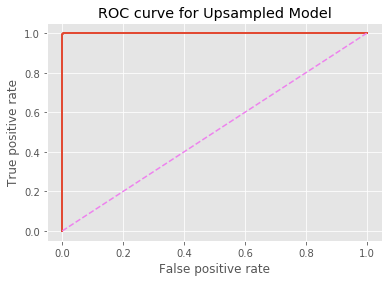

In [31]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Upsampled Model');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, lr2.predict_proba(X_test)[:,1])

ROC AUC score =  0.3046981070149362


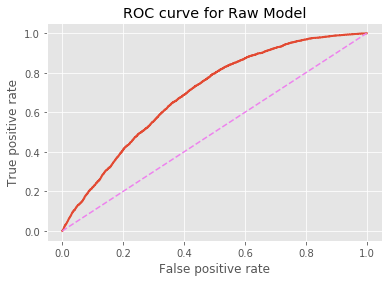

In [33]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Raw Model');
print("ROC AUC score = ", roc_auc_score(y_test, lr2.predict_proba(X_test)[:,0]))

## Accuracy and Confusion Matrix Comparisons

In [26]:
# upsampled model looks like it's just guessing everything is not delinquent
print('Upsampled Model Accuracy' + ' ' + str(lr.score(X_test, y_test)))
print('Raw Model Accuracy' + ' ' + str(lr2.score(X_test, y_test)))

Upsampled Model Accuracy 0.9887579955642699
Raw Model Accuracy 0.9749284818874353


In [27]:
#Raw model is not predicting delinquencies because the data is so lopsided 
#upsampled model predicts 69% delinquencies and ~100% non-delinquencies
print('Upsampled Model Confusion Matrix')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('Raw Model Confusion Matrix')
print(confusion_matrix(y_test, lr2.predict(X_test)))

Upsampled Model Confusion Matrix
[[119942   1397]
 [     2   3103]]
Raw Model Confusion Matrix
[[121323     16]
 [  3104      1]]



![](Confusion_matrix.png)

In [98]:
Upsample_cm = confusion_matrix(y_test, lr.predict(X_test))

In [2]:
sns.heatmap(Upsample_cm, cmap=plt.cm.Blues, annot=True, square=True,)
#plt.title('Upsampled Confusion Matrix');

NameError: name 'sns' is not defined

In [1]:
#precision_score, recall_score, accuracy_score, roc_auc_score
# print(lr2.precision_score(X_test, y_test))

NameError: name 'lr2' is not defined